# Реализация метода покоординатного спуска

Итераций:  6
1.9989002938462135 1.9989002938462135


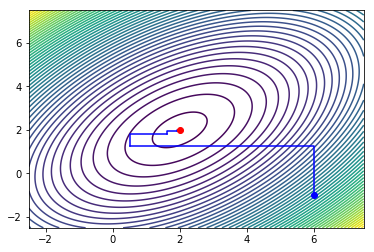

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
from numpy import pi,cos,sin,abs,sqrt,exp
import matplotlib.pyplot as plt
from scipy import optimize

def f(x,y):
    return (x-1)**2+(y-1)**2-x*y

phi = 0.5 * (1.0 + sqrt(5.0))

# Поиск минимума функции одной переменной методом золотого сечения
# f - входная функция двух аргументов, eps - абсолютная погрешность
# X логическое значение: false минимизировать по первому аргументы, true по второму,
# par - значение зафиксированной переменной.
def minimize(f,eps,a,b,X,par): 
    dd=abs(f(b,par)-f(a,par))
    if X:
        dd=abs(f(par,b)-f(par,a))
    if dd < eps: 
        return (a+b)/2
    else:
        t = (b-a)/phi
        x1, x2 = b - t, a + t
        q=f(x1,par)
        Q=f(x2,par)
        if X:
            q=f(par,x1)
            Q=f(par,x2)
        if q>=Q:
            return minimize(f, eps, x1, b,X,par)
        else:
            return minimize(f, eps, a, x2,X,par)


xmin,xmax=-2.5,7.5
ymin,ymax=-2.5,7.5
x0,y0=6,-1
eps=0.0001

X = np.arange(xmin,xmax, 0.010)
Y = np.arange(ymin,ymax, 0.010)
X, Y = np.meshgrid(X, Y)

plt.contour(X,Y,f(X,Y),50)
plt.plot(x0,y0,'bo')

i=xo=yo=0
while abs(f(xo,yo)-f(x0,y0))>eps:
    i+=1
    if i>10**3:
        print('break!')
        break
    xo,yo=x0,y0
    x0=minimize(f,eps,xmin,xmax,False,y0)
    y0=minimize(f,eps,ymin,ymax,True,x0)
    plt.plot([xo,xo,x0],[yo,y0,y0],'-b')

plt.plot(x0,y0,'ro')
print('Итераций: ', i)
print(x0,y0)
plt.show()